<a href="https://colab.research.google.com/github/Todd061022/L-ink_Card/blob/master/satisfacation%20AUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

請上傳CSV檔案


Saving satisfaction_300.csv to satisfaction_300.csv
資料集前五行：
   Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
0    Male   48    First-time       Business  Business              821   
1  Female   35     Returning       Business  Business              821   
2    Male   41     Returning       Business  Business              853   
3    Male   50     Returning       Business  Business             1905   
4  Female   49     Returning       Business  Business             3470   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2              5                                       3   
1               26             39                                       2   
2                0              0                                       4   
3                0              0                                       2   
4                0              1                                       3   

   Ease of Online Booking  ...  

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


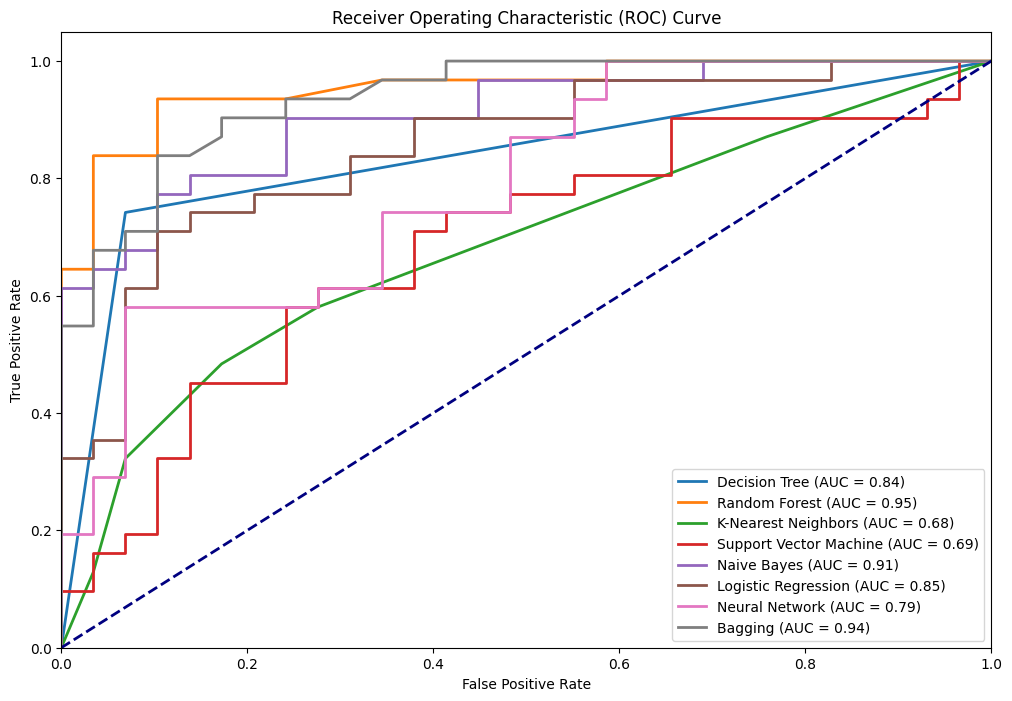

分類器的評估標準：
                        Accuracy  Precision    Recall  F1 Score  Specificity  \
Decision Tree           0.833333   0.848190  0.833333  0.832217     0.931034   
Random Forest           0.850000   0.871065  0.850000  0.848531     0.965517   
K-Nearest Neighbors     0.650000   0.677500  0.650000  0.640153     0.827586   
Support Vector Machine  0.650000   0.689550  0.650000  0.635614     0.862069   
Naive Bayes             0.783333   0.801157  0.783333  0.781212     0.896552   
Logistic Regression     0.800000   0.806285  0.800000  0.799555     0.862069   
Neural Network          0.633333   0.714839  0.633333  0.601754     0.931034   
Bagging                 0.816667   0.826659  0.816667  0.815901     0.896552   

                             AUC  
Decision Tree           0.836485  
Random Forest           0.954950  
K-Nearest Neighbors     0.682981  
Support Vector Machine  0.685206  
Naive Bayes             0.907675  
Logistic Regression     0.853170  
Neural Network          

In [2]:
# 載入必要的庫
from google.colab import files  # 用於上傳檔案
import pandas as pd  # 用於資料操作
from sklearn.model_selection import train_test_split  # 用於將資料切分為訓練集和測試集
from sklearn.preprocessing import LabelEncoder  # 用於編碼類別型資料
from sklearn.impute import SimpleImputer  # 用於填補缺失值
from sklearn.tree import DecisionTreeClassifier  # 用於決策樹分類器
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier  # 用於隨機森林分類器和Bagging分類器
from sklearn.neighbors import KNeighborsClassifier  # 用於K近鄰分類器
from sklearn.svm import SVC  # 用於支持向量機分類器
from sklearn.naive_bayes import GaussianNB  # 用於朴素貝葉斯分類器
from sklearn.linear_model import LogisticRegression  # 用於邏輯迴歸分類器
from sklearn.neural_network import MLPClassifier  # 用於神經網路分類器
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc  # 用於計算模型評估標準
import matplotlib.pyplot as plt  # 用於繪圖
from sklearn.preprocessing import label_binarize  # 用於多類別的ROC計算

# 步驟1：上傳CSV檔案
print("請上傳CSV檔案")  # 提示使用者上傳檔案
uploaded = files.upload()  # 上傳檔案

# 讀取CSV檔案
filename = list(uploaded.keys())[0]  # 獲取上傳檔案的名稱
data = pd.read_csv(filename)  # 讀取CSV檔案

# 顯示前五行資料
print("資料集前五行：")  # 顯示提示
print(data.head())  # 顯示資料集前五行

# 步驟2：資料預處理
# 處理類別型資料
categorical_columns = ["Gender", "Customer Type", "Type of Travel", "Class", "Satisfaction"]  # 定義類別型欄位
label_encoders = {}  # 用於儲存每個類別型欄位的編碼器

for column in categorical_columns:  # 對每個類別型欄位進行處理
    le = LabelEncoder()  # 創建LabelEncoder物件
    data[column] = le.fit_transform(data[column])  # 將類別型資料轉換為數值型資料
    label_encoders[column] = le  # 儲存編碼器

# 填補缺失值
imputer = SimpleImputer(strategy="mean")  # 創建SimpleImputer物件，使用平均值填補缺失值
data_imputed = imputer.fit_transform(data)  # 填補缺失值

# 將處理後的資料轉換回DataFrame
data = pd.DataFrame(data_imputed, columns=data.columns)  # 將填補後的資料轉換回DataFrame

# 分離特徵值和目標值
X = data.drop("Satisfaction", axis=1)  # 提取特徵值（除去目標值）
y = data["Satisfaction"]  # 提取目標值

# 將資料切分成訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 切分資料，80%為訓練集，20%為測試集

print("訓練集大小:", X_train.shape)  # 顯示訓練集大小
print("測試集大小:", X_test.shape)  # 顯示測試集大小

# 步驟3：使用分類演算法進行預測
# 創建分類器
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),  # 決策樹分類器
    "Random Forest": RandomForestClassifier(),  # 隨機森林分類器
    "K-Nearest Neighbors": KNeighborsClassifier(),  # K近鄰分類器
    "Support Vector Machine": SVC(probability=True),  # 支持向量機分類器
    "Naive Bayes": GaussianNB(),  # 朴素貝葉斯分類器
    "Logistic Regression": LogisticRegression(max_iter=1000),  # 邏輯迴歸分類器
    "Neural Network": MLPClassifier(max_iter=1000),  # 神經網路分類器
    "Bagging": BaggingClassifier(n_estimators=100)  # Bagging分類器
}

# 訓練並評估每個分類器
results = {}  # 用於儲存每個分類器的評估結果
plt.figure(figsize=(12, 8))  # 設置圖形大小

for name, clf in classifiers.items():  # 遍歷每個分類器
    clf.fit(X_train, y_train)  # 訓練分類器
    y_pred = clf.predict(X_test)  # 使用測試集進行預測
    y_pred_proba = clf.predict_proba(X_test)[:, 1]  # 預測概率，用於ROC和AUC

    accuracy = accuracy_score(y_test, y_pred)  # 計算準確率
    precision = precision_score(y_test, y_pred, average='weighted')  # 計算精確率
    recall = recall_score(y_test, y_pred, average='weighted')  # 計算召回率
    f1 = f1_score(y_test, y_pred, average='weighted')  # 計算F1得分

    # 計算Specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)

    # 計算ROC和AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # 繪製ROC曲線
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

    results[name] = {  # 儲存結果
        "Accuracy": accuracy,  # 準確率
        "Precision": precision,  # 精確率
        "Recall": recall,  # 召回率
        "F1 Score": f1,  # F1得分
        "Specificity": specificity,  # Specificity
        "AUC": roc_auc  # AUC值
    }

# 繪製隨機猜測的ROC曲線
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 顯示結果
results_df = pd.DataFrame(results).T  # 將結果轉換為DataFrame
print("分類器的評估標準：")  # 顯示提示
print(results_df)  # 顯示結果
